Data visualization and a part of data preprocessing was done in the previous notebook (**1-visualizations.ipynb**). This notebook will continue on the result from the previous one with the following tasks listed bellow.

---

**✨ Dataset:**

5. Proveďte všechny další úpravy, které jsou podle vás pro práci s vybraným datasetem nezbytné (např. konverze datových typů, odstranění duplicitních údajů, vytvoření nových příznaků, sjednocení reprezentace chybějících dat nebo jejich odstranění apod.). K úpravě datasetu se můžete v průběhu řešení úlohy vracet.
6. Připravte dataset tak, abyste na něm mohli natrénovat a vyhodnotit vybraný model (např. data vhodně rozdělte, pokud je to pro váš model a evaluaci nutné, rozdělení komentujte, nebo můžete využít křížovou validaci apod. -> znáte z BI-ML1).

Z této části lze získat celkem 15 bodů.

**⚙️Model:**
V této části je vaším úkolem natrénovat model, který se pokusí vyřešit vaši úlohu. Zaměřte se především na vizualizaci jednotlivých kroků a výsledků, včetně komentářů. Kvalita modelu jako takového nebude hodnocena.
1. ✅Pro svoji úlohu zvolte vhodný klasifikační/regresní model.
2. ✅Zvolte si alespoň dva hyperparametry spolu s minimálně pěti hodnotami (zde může být i více, případně méně v závislosti na zvoleném hyperparametru), jejichž nejlepší kombinaci budete během trénování modelu hledat. Zvolené hyperparametry a jejich hodnoty popište.
3. ✅Zvolte a popište ztrátovou funkci, pomocí které provedete vyhodnocení úspěšnosti modelu.
4. Daný model na datasetu natrénujte. Pokud to lze, model vizualizujte.
5. ✅Vhodně vizualizujte a komentujte vliv jednotlivých kombinací hyperparamentrů na úspěšnost modelu. Uveďte nejlepší kombinaci.
6. Pokud to lze (!), vizualizujte rozhodovací hranici nejlepšího modelu pro vámi vybrané příznaky. Pokud to nelze, zdůvodněte, případně realizujte jinou viualizaci související s prezentací nejlepšího modelu.
7. ✅Vhodně vizualizujte úspěšnost výsledného modelu - využijte alespoň dvě vizualizační metody.

**Pro zájemce:** Pokud byste chtěli, můžete pro řešení úlohy použít modelů více a provést jejich srovnání (včetně ladění hyperparametrů a dalších kroků zmíněných výše).

Z této části lze získat celkem 25 bodů.

---

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer

from skopt import BayesSearchCV
from scipy.sparse import vstack

from mlxtend.plotting import plot_decision_regions 
# from dtreeviz.trees import dtreeviz

from yellowbrick.classifier import ROCAUC
sns.set_theme()

# ✨ Dataset part

## 5/ Data preprocessing
This notebook follow the data from the previous notebook (1-visualizations.ipynb). Regarding data preprocessing there were introduced **new features**. This notebook follows up with the *duplicities handling*, *missing values* and *conversions to the proper data type*.

### 5.1/ Missing values
TODO

In [55]:
df = pd.read_csv('games_preprocessed.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20058 non-null  object 
 1   rated               20058 non-null  bool   
 2   turns               20058 non-null  int64  
 3   victory_status      20058 non-null  object 
 4   winner              20058 non-null  object 
 5   increment_code      20058 non-null  object 
 6   white_id            20058 non-null  object 
 7   white_rating        20058 non-null  int64  
 8   black_id            20058 non-null  object 
 9   black_rating        20058 non-null  int64  
 10  moves               20058 non-null  object 
 11  opening_eco         20058 non-null  object 
 12  opening_name        20058 non-null  object 
 13  opening_ply         20058 non-null  int64  
 14  last_move_piece     6325 non-null   object 
 15  last_move_row       6325 non-null   object 
 16  last

### 5.2/ Duplicities

In [56]:
df[df.duplicated()]

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,...,white_pawns_lost,white_knights_lost,white_bishops_lost,white_rooks_lost,white_queens_lost,black_pawns_lost,black_knights_lost,black_bishops_lost,black_rooks_lost,black_queens_lost
950,XRuQPSzH,True,50,resign,black,10+0,chess-brahs,2036,cdvh,1706,...,4,1,1,0,0,1,2,0,0,0
1794,x1Svcl0P,True,59,mate,white,10+0,kachess10204542,1171,quantummequanic,1432,...,4,1,1,1,0,3,2,2,0,1
1830,wgIHzqDo,True,113,mate,white,10+0,quantummequanic,1403,barrow-wight,1364,...,7,0,2,2,0,8,2,2,2,1
2554,JrFxlGZo,False,78,mate,black,15+0,sp37578,1309,penguin100,1393,...,4,2,2,0,1,5,2,2,1,1
2556,ezKACesj,False,51,mate,white,15+0,penguin100,1393,sp37578,1309,...,5,2,1,1,0,1,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20013,Uk0pZCRR,True,95,resign,black,45+45,kferapont,2094,moistvonlipwig,2228,...,4,2,2,2,1,7,2,1,2,1
20014,ZhZm1ol9,True,109,draw,draw,45+45,moistvonlipwig,2229,mn8,2220,...,6,2,1,2,1,7,2,2,1,1
20015,fpqjttDx,True,42,resign,black,7+30,waltersafarian,2162,moistvonlipwig,2214,...,2,1,2,1,0,2,1,1,1,0
20016,lzPgCJCS,True,102,resign,black,7+30,moistvonlipwig,2236,waltersafarian,2148,...,5,1,2,2,1,5,2,2,2,0


It's a bit suspicious how many duplicites are there, so let's check manually. Down bellow it may be seen that for one match there are 5 records.

In [57]:
df[df['id'] == 'XRuQPSzH']

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,...,white_pawns_lost,white_knights_lost,white_bishops_lost,white_rooks_lost,white_queens_lost,black_pawns_lost,black_knights_lost,black_bishops_lost,black_rooks_lost,black_queens_lost
120,XRuQPSzH,True,50,resign,black,10+0,chess-brahs,2036,cdvh,1706,...,4,1,1,0,0,1,2,0,0,0
950,XRuQPSzH,True,50,resign,black,10+0,chess-brahs,2036,cdvh,1706,...,4,1,1,0,0,1,2,0,0,0
12412,XRuQPSzH,True,50,resign,black,10+0,chess-brahs,2036,cdvh,1706,...,4,1,1,0,0,1,2,0,0,0
13729,XRuQPSzH,True,50,resign,black,10+0,chess-brahs,2036,cdvh,1706,...,4,1,1,0,0,1,2,0,0,0
14403,XRuQPSzH,True,50,resign,black,10+0,chess-brahs,2036,cdvh,1706,...,4,1,1,0,0,1,2,0,0,0


So let's just keep the first one.

In [58]:
df = df[~df.duplicated()]
df.shape

(19113, 27)

So dataframe is now reduced to 19k rows.

### 5.3/ Drop useless features
Some features were dropped in the previous notebook. Add also features:
- `id` since it's just an id
- `moves` since it's an array of moves, extracting them would drastically increase the dimensionality of the dataset and the crucial information - last move is already extracted

In [59]:
df.drop(['id', 'moves'], axis=1, inplace=True)

In [60]:
df

,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,...,white_pawns_lost,white_knights_lost,white_bishops_lost,white_rooks_lost,white_queens_lost,black_pawns_lost,black_knights_lost,black_bishops_lost,black_rooks_lost,black_queens_lost
0,False,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,...,1,0,0,0,0,2,0,0,0,0
1,True,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,...,2,0,0,0,1,2,0,0,0,0
2,True,61,mate,white,5+10,ischia,1496,a-00,1500,C20,...,1,1,1,0,0,7,2,2,2,1
3,True,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,D02,...,2,1,1,0,0,4,2,2,1,1
4,True,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,C41,...,5,2,2,1,0,7,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,True,24,resign,white,10+10,belcolt,1691,jamboger,1220,A80,...,1,1,0,0,0,2,0,0,0,0
20054,True,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,A41,...,7,1,2,2,0,3,2,2,2,0
20055,True,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,D00,...,0,1,1,0,0,1,1,0,0,0
20056,True,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,B07,...,6,2,2,1,0,7,2,2,2,1


### 5.4/ Data type conversion
Following features will be changed:
- `victory_status` ➡️ Category
- `winner` ➡️ Category
- `increment_code` ➡️ Category
- `white_id` ➡️ Category
- `black_id` ➡️ Category
- `opening_eco` ➡️ Category
- `opening_name` ➡️ Category
- `last_move_piece` ➡️ Category

In [61]:
for col_name in ['victory_status', 'winner', 'increment_code', 'white_id', 'black_id', 'opening_eco', 'opening_name', 'last_move_piece']:
    df[col_name] = df[col_name].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19113 entries, 0 to 20057
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   rated               19113 non-null  bool    
 1   turns               19113 non-null  int64   
 2   victory_status      19113 non-null  category
 3   winner              19113 non-null  category
 4   increment_code      19113 non-null  category
 5   white_id            19113 non-null  category
 6   white_rating        19113 non-null  int64   
 7   black_id            19113 non-null  category
 8   black_rating        19113 non-null  int64   
 9   opening_eco         19113 non-null  category
 10  opening_name        19113 non-null  category
 11  opening_ply         19113 non-null  int64   
 12  last_move_piece     5974 non-null   category
 13  last_move_row       5974 non-null   object  
 14  last_move_col       5974 non-null   float64 
 15  white_pawns_lost    19113 non-null  

## 6/ Data splitting and preparation

### 6.1/ Data splitting
The data are split in the classical way - *70-15-15*, not using the *cross-validation*. As will be described in the *Model part 1/*, the explained variable is `winner` (multiclass classification).

In [62]:
X_train_root, X_test_root, y_train_root, y_test_root = train_test_split(df.drop('winner', axis=1), df['winner'], test_size=0.3, random_state=11)
X_valid_root, X_test_root, y_valid_root, y_test_root = train_test_split(X_test_root, y_test_root, test_size=0.5, random_state=11) 

def get_dataset():
     return copy.deepcopy(X_train_root), copy.deepcopy(X_valid_root), copy.deepcopy(y_train_root), copy.deepcopy(y_valid_root)
    
def get_test_dataset():
    return copy.deepcopy(X_test_root), copy.deepcopy(y_test_root)

In [63]:
X_train, X_valid, y_train, y_valid = get_dataset()

### 6.2 Categorical features encoding
Dataset is made from a lot categorical features. If one-hot-encoding was used, there would be dozens of new almost constant features (almost constant means that there is many unique values with only one occurence in the categorical features).

In [64]:
constant_features_cnt = 0
for col in X_train.select_dtypes('category').columns:
    constant_features_cnt += (X_train[col].value_counts() <= 1).sum()

print(f'There would be {constant_features_cnt} quasi-constant new features.')

There would be 16704 quasi-constant new features.


So the solution is to take all the categorical columns - encode the ones with at least two occruences and put the rest (unique with count one) to the last feature. This can be handled via OneHotEncoder's parameters. Create pipeline for easier manipulation in later phases.

In [65]:
numerical_features = X_train.select_dtypes('number').columns.tolist()
categorical_features = X_train.drop(numerical_features, axis=1).columns.tolist()

In [66]:
from sklearn.impute import SimpleImputer

In [67]:
encoder = OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=2, sparse=False)
imputer = SimpleImputer(strategy="median")

pipeline = ColumnTransformer(transformers=[('cat', encoder, categorical_features),
                                          ('impute', imputer, numerical_features)])

In [68]:
X_train, X_valid, y_train, y_valid = get_dataset()

In [69]:
X_train = pipeline.fit_transform(X_train)

In [70]:
enc = OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=2, sparse=False)
enc.fit_transform(X_train).shape

(13379, 11465)

# ⚙️Model

## 1/ Model selection
Pro svoji úlohu zvolte vhodný klasifikační/regresní model.

In [71]:
X_train, X_valid, y_train, y_valid = get_dataset()
y_train.value_counts()

white    6693
black    6084
draw      602
Name: winner, dtype: int64

This is a multi-label **classification task** where the aim is to predict the result of the match. One more thing to consider is a high dimension - thanks to the many values in categorical features. So the model should be relatively resistant to high dimensions. Regarding this the **Random Forest** is chosen. It has a relatively good performance in the higher dimensional data + it's resistant to overfitting.

As may be seen, there are 7132 features.

In [72]:
pipeline.fit_transform(X_train).shape

(13379, 4348)

## 2/ Model hyperparameters
Zvolte si alespoň dva hyperparametry spolu s minimálně pěti hodnotami (zde může být i více, případně méně v závislosti na zvoleném hyperparametru), jejichž nejlepší kombinaci budete během trénování modelu hledat. Zvolené hyperparametry a jejich hodnoty popište.

Chosen hyperparameters are:
- `n_estimators` (Number of trees in the forest)
    - Default is 100, for tweaking, some integers in the range (30, 1000) will be chosen
- `criterion` (Function that measures quality of split in the tree's construction)
    - Default is `gini`. Other possible values are `gini` and `log_loss`
    

Tuning the hypeparameters is done in the section *5/ Hyperparameter tuning*.

## 3/ Model evaluation
Zvolte a popište ztrátovou funkci, pomocí které provedete vyhodnocení úspěšnosti modelu.

Since this is a multiclass classification, accuracy shouldn't be used. Instead, use `confusion matrix` and `F1 score`.

### 3.1/ Confusion Matrix
Confusion matrix is representing the performance of the trained model. Each row represents an actual class while each column represents the predicted class. If the classifier was flawless non-zeros would be only on a diagonal.

In [91]:
def show_confusion_matrix(y_truth, y_pred):
    ConfusionMatrixDisplay.from_predictions(y_truth, y_pred, cmap='inferno')
    plt.title('Confusion matrix')
    plt.show()

### 3.2/ F1 Score
**F1 Score** is calculated from precision (TP/P) and recall (TP/(FN+TP)) - it's the harmonic mean of those variables, they are in trade-off relationship. The highest (best) value is 1, the worst one is 0. F1 Score is calculated for each predicted class.

In [74]:
def get_f1_score(y_truth, y_pred, return_vals=False):
    res = f1_score(y_truth, y_pred, average=None, labels=['white', 'black', 'draw'])
    if return_vals:
        return {'white': res[0], 'black': res[1], 'draw': res[2]}
    else:
        print(f'white: {res[0]:.2f}')
        print(f'black: {res[1]:.2f}')
        print(f'draw: {res[2]:.2f}')

## 4/ Model training
Daný model na datasetu natrénujte. Pokud to lze, model vizualizujte. Daný model na datasetu natrénujte. Pokud to lze, model vizualizujte.

### 4.1/ Training

In [75]:
X_train, X_valid, y_train, y_valid = get_dataset()
X_train = pipeline.fit_transform(X_train)
X_valid = pipeline.transform(X_valid)

model = RandomForestClassifier().fit(X_train, y_train)

### 4.2/ Evaulation

#### 4.2.1/ Confusion matrix
Regarding the confusion matrix classification ended up with relatively good results. The "biggest" problem is between black and white - that black is predicted as white and white as black. Otherwise the results are good.

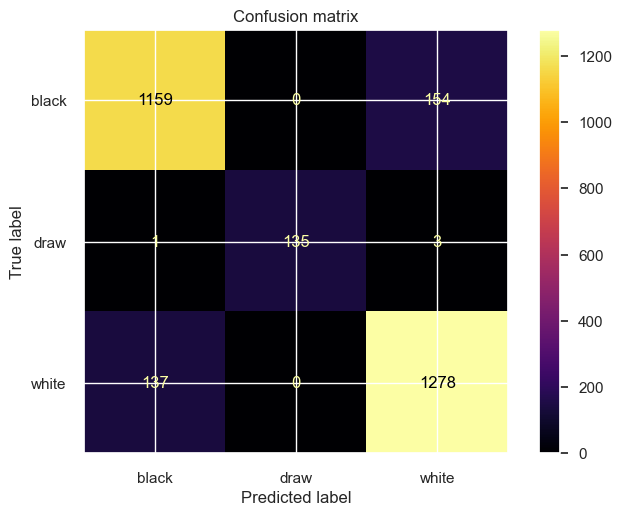

In [92]:
show_confusion_matrix(y_valid, model.predict(X_valid))

#### 4.2.2/ F1 Score
The best results regarding F1 Score was achieved with the class `draw`.

In [77]:
get_f1_score(y_valid, model.predict(X_valid))

white: 0.90
black: 0.89
draw: 0.99


## 5/ Hyperparameter tuning
As was stated in *2/ Model hyperparameters*, hyperparameters `n_estimators` and `criterion` are tuned.

### 5.1/ Bayesian search
For the best hyperparameter combination, Bayesian search is used. Unlike Grid Search or Random search, the tuning algorithm optimizes its parameter selection in each round - according to the previous score. Search is not extensive so it is faster.
Weighted F1 Score is used for the evaulation - one number for all the classes weighted by their total count.

Also Bayesian search uses cross validation so the training and validation sets (already transformed based on training data) can be merged.

In [95]:
try:
    res = pd.read_csv('bayes-search-results.csv').drop('Unnamed: 0', axis=1)
except:
    X_train, X_valid, y_train, y_valid = get_dataset()
    X_train = pipeline.fit_transform(X_train)
    X_valid = pipeline.transform(X_valid)


    X_merged = vstack((X_train, X_valid))
    y_merge = np.concatenate([y_train, y_valid])


    param_grid = {
        'n_estimators': [x for x in range(50, 1001, 50)],
        'criterion': ['gini', 'log_loss', 'entropy']
    }

    reg_bay = BayesSearchCV(estimator=RandomForestClassifier(), search_spaces=param_grid, n_iter=30, cv=4, n_jobs=8, scoring='f1_weighted')
    model_bay = reg_bay.fit(X_merged, y_merge)
    res = pd.DataFrame().from_dict(model_bay.cv_results_).sort_values(by='rank_test_score')
    res.to_csv('bayes-search-results.csv')

### 5.2/ Results
The best results are achieved when `criterion = entropy` and `n_estimators = 900`

In [96]:
res.loc[0, ['rank_test_score', 'param_criterion', 'param_n_estimators']]

rank_test_score             1
param_criterion       entropy
param_n_estimators        750
Name: 0, dtype: object

Relationship between the model performance and the value of parameters can be visualized.

For the `n_estimators` it may be seen that the best value is somewhere around 750 trees. For the criterion, `entropy` has the smallest dispersion, so it is most suitable. Chosen hyperparameters are:
- **criterion**: `entropy`
- **n_estimators**: `750`

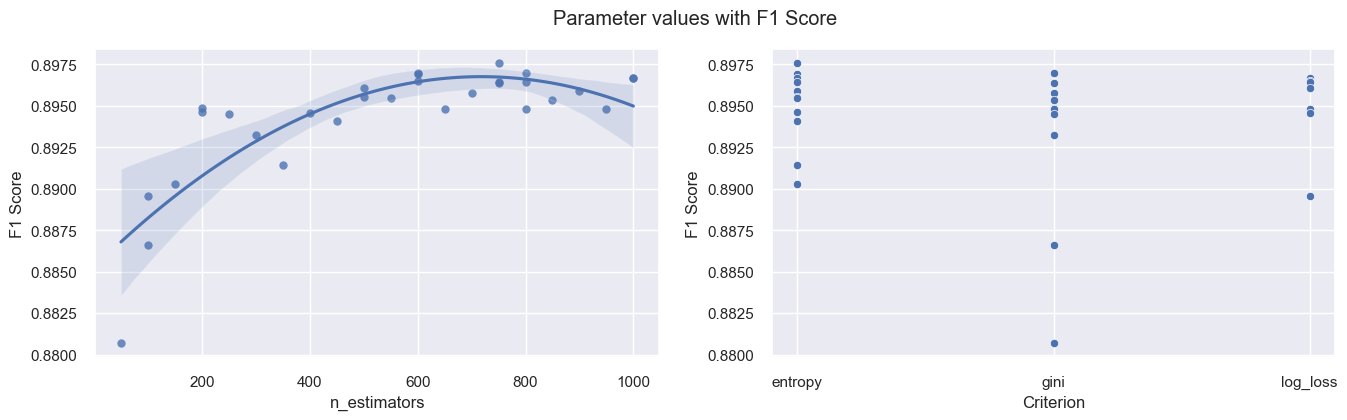

In [97]:
fig, axs = plt.subplots(1,2, figsize=(16,4))
fig.suptitle('Parameter values with F1 Score')

sns.regplot(data=res, x='param_n_estimators', y='mean_test_score', ax=axs[0], order=2)
axs[0].set_xlabel('n_estimators')
axs[0].set_ylabel('F1 Score')

sns.scatterplot(data=res, x='param_criterion', y='mean_test_score', ax=axs[1])
axs[1].set_xlabel('Criterion')
axs[1].set_ylabel('F1 Score')

plt.show()

In [81]:
def get_best_model():
    return RandomForestClassifier(criterion='entropy', n_estimators=900)

## 6/ Decision border
Pokud to lze (!), vizualizujte rozhodovací hranici nejlepšího modelu pro vámi vybrané příznaky. Pokud to nelze, zdůvodněte, případně realizujte jinou viualizaci související s prezentací nejlepšího modelu.

Train model with the best hyperparameters obtained from *5/ Hyperparameter tuning*. 

In [83]:
X_train, X_valid, y_train, y_valid = get_dataset()
X_train = pipeline.fit_transform(X_train)
X_valid = pipeline.transform(X_valid)

model = get_best_model().fit(X_train, y_train)

In [84]:
X = [[x[0], x[1]] for x in X_train]

In [85]:
X = np.array(X)

In [86]:

y_valid = pd.factorize(y_valid)[0]
y_train = pd.factorize(y_train)[0]

D:\Aplikace\Anaconda\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


(<AxesSubplot: >,)

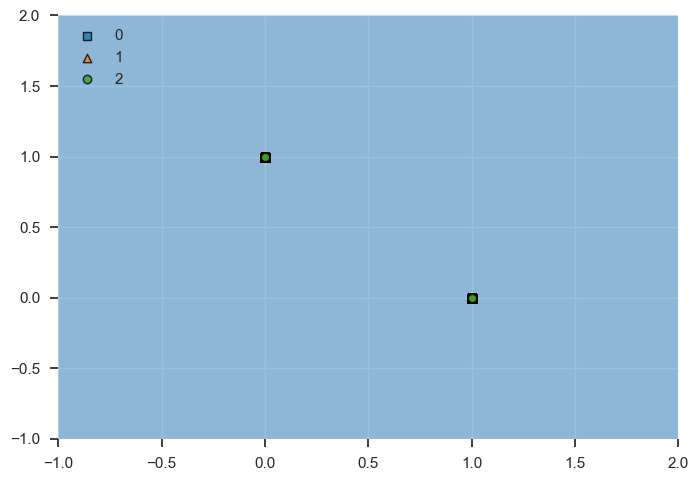

In [87]:
# fig, ax = plt.subplots(figsize=(16,8))

# styling
# scatter_kwargs = {'edgecolor': None, 'alpha': 0.7}
# contourf_kwargs = {'alpha': 0.3}

# plotting
plot_decision_regions(X, y_train, clf=RandomForestClassifier().fit(X, y_train), legend=2, feature_index=[0, 1],
                     filler_feature_values={x: 1.5 for x in range(2, X_train.shape[1])},
                     filler_feature_ranges={x: 1.5 for x in range(2, X_train.shape[1])}), #scatter_kwargs=scatter_kwargs, contourf_kwargs=contourf_kwargs)

## 7/ Results
Vhodně vizualizujte úspěšnost výsledného modelu - využijte alespoň dvě vizualizační metody.

### 7.1/ Test error
Evaluate model on the test data and compare the error distribution with the train/valid data.

In [93]:
X_test, y_test = get_test_dataset()
X_train, X_valid, y_train, y_valid = get_dataset()
X_train = pipeline.fit_transform(X_train)
X_valid = pipeline.transform(X_valid)
X_test = pipeline.transform(X_test)

model = get_best_model_model().fit(X_train, y_train)

# Create df with the results
res = {}
res['Train'] = get_f1_score(model.predict(X_train), y_train, return_vals=True)
res['Valid'] = get_f1_score(model.predict(X_valid), y_valid, return_vals=True)
res['Test'] = get_f1_score(model.predict(X_test), y_test, return_vals=True)
res = pd.DataFrame(data=res).unstack().reset_index().rename(columns={'level_0': 'set', 'level_1': 'class', 0: 'F1 Score'})

Regarding the barplot bellow, F1 score is almost the same for the validation and test set - which is good. It's also interesting that F1 Score at class `draw` is much higher. This means that the draw can be easily recognized from the given data.

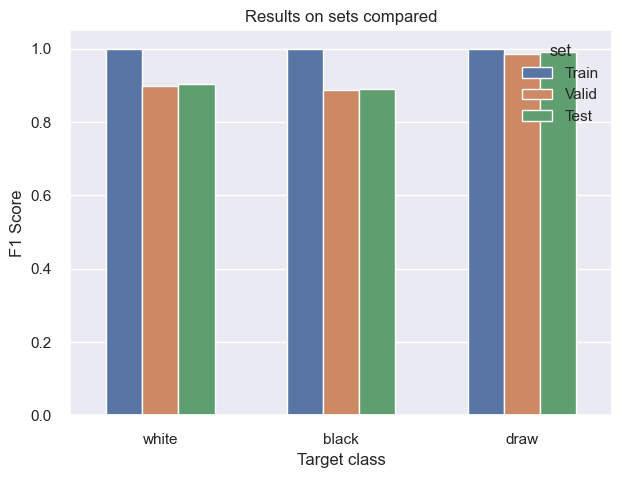

In [89]:
plt.figure(figsize=(7,5))
plt.title('Results on sets compared')
sns.barplot(data=res, x='class', y='F1 Score', hue='set', width=.6)
plt.xlabel('Target class')
plt.ylabel('F1 Score')
plt.show()

### 7.2/ ROC AUC score
This function could have been also used as a loss function. For this visualization, it will visualize ROC for each class. By default, it's for the binary classification, but it can be further applying the one-versus-all classification method.

Interesting is that AUC for the `draw` class is $1.0$. This means that if we wanted to classify just if the game is draw or not, we would approach to the best possible classifier with almost 100% accuracy. 

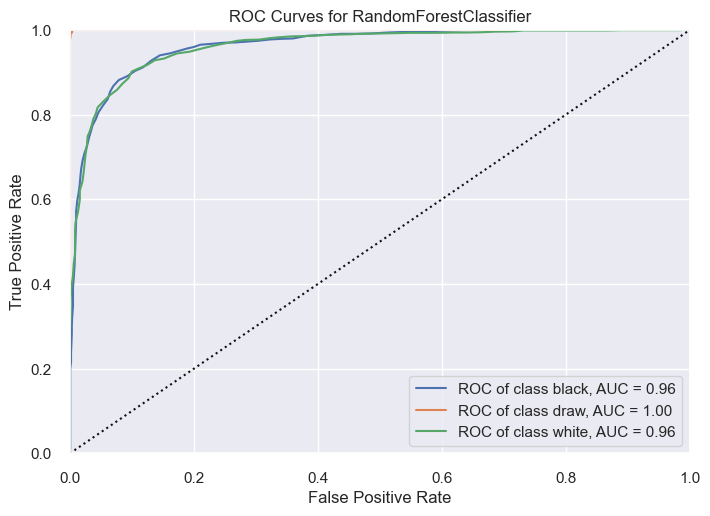

In [90]:
visualizer = ROCAUC(model, macro=False, micro=False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
plt.show()